# Field of View

In [5]:
import math

# tello stats
H = height = 1936 # pixels
W = width = 2592 # pixels
FOV_diagnol = math.radians(82.6) # degrees to radians
D = diagnol = math.sqrt(H**2 + W**2)
FOV_horizontal = math.atan(math.tan(FOV_diagnol/2) * W / D)**2 # radians
FOV_vertical = 2 * math.atan(math.tan(FOV_horizontal/2) * W / H) # radians
print('Diagnol FOV (degrees):', math.degrees(FOV_diagnol))
print('Horizonal FOV (degrees):', math.degrees(FOV_horizontal))
print('Vertical FOV (degrees):', math.degrees(FOV_vertical))

Diagnol FOV (degrees): 82.60000000000001
Horizonal FOV (degrees): 21.551822670919492
Vertical FOV (degrees): 28.59115845728329


# Step Sizes

In [21]:
f = desired_forward_step_size = 5 # meters
eps_f = max_error_forward = 0.5 # meters
eps_d = max_error_downward = 0.5 # meters
c = collision_tollerance = 0.5 # meters from drone.get_position() below drone that will cause a collision
theta = FOV_vertical_half = FOV_vertical / 2 # radians
n = n_previous_frames = 2 # number frames to look back 
d = desired_downward_step_size = n*(f-eps_f)*math.tan(theta) - eps_d - c
print('Downward Step Size must be <', d, 'meters')

Downward Step Size must be < 1.293331717510676 meters


# NEURAL NETWORK EXPERIMENTATION

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def angle_diff(a1, a2):
    #return a1 - a2
    #return abs(a1 - a2)
    #return a1 - a2 - math.pi
    #return abs(a1 - a2) - math.pi
    return math.pi - abs(abs(a1 - a2) - math.pi)

In [3]:
print(
    int(round(np.degrees(angle_diff(np.radians(90), np.radians(180))),0)),
    int(round(np.degrees(angle_diff(np.radians(-160),np.radians(-40))),0)),
    int(round(np.degrees(angle_diff(np.radians(90), np.radians(-120))),0)),
    int(round(np.degrees(angle_diff(np.radians(-90), np.radians(150))),0)),
)

90 120 150 120


In [4]:
n_train = 1000
n_test = 100
n_features = 2
n_output = 2
max_iters = 10000

In [5]:
X_train = np.random.rand(n_train, n_features)*2*math.pi - math.pi
print(X_train.shape, X_train.min(), X_train.max())

(1000, 2) -3.137622600837204 3.1394808625658177


In [6]:
X_test = np.random.rand(n_test, n_features)*2*math.pi - math.pi
print(X_test.shape, X_test.min(), X_test.max())

(100, 2) -3.1320323652997617 3.0367574977859704


In [7]:
def get_labels(X):
    Y = np.zeros((X.shape[0], n_output))
    for n in range(X.shape[0]):
        diff = angle_diff(X[n, 0], X[n, 1])
        if diff  < 1:
            Y[n] = [1, 0]
        else:
            Y[n] = [0, 1]
    print(Y.shape, Y.min(), Y.max())
    return Y
Y_train = get_labels(X_train)
Y_test = get_labels(X_test)

(1000, 2) 0.0 1.0
(100, 2) 0.0 1.0


0.92 0.93


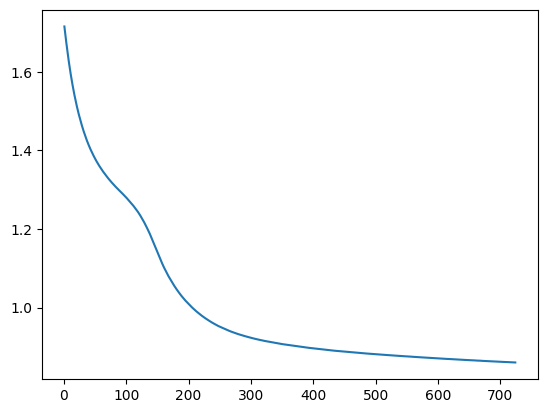

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=max_iters, early_stopping=False)
mlp.fit(X_train, Y_train)
P_train = mlp.predict(X_train)
P_test = mlp.predict(X_test)
print(accuracy_score(P_train, Y_train), accuracy_score(P_test, Y_test))
iters = [i+1 for i in range(len(mlp.loss_curve_))]
plt.plot(iters, mlp.loss_curve_)

(1000, 1) 0.003760024359801939 3.1414227365337206
(100, 1) 0.021988614426438957 3.100635200028117
0.994 0.98


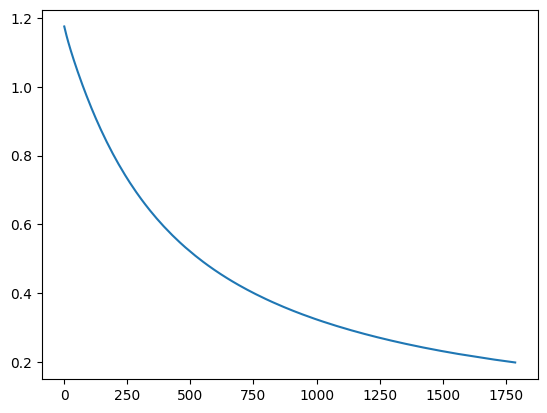

In [13]:
def get_x2(X):
    X2 = np.zeros((X.shape[0], 1))
    for n in range(X.shape[0]):
        diff = angle_diff(X[n, 0], X[n, 1])
        X2[n] = diff
    print(X2.shape, X2.min(), X2.max())
    return X2
X_train2 = get_x2(X_train)
X_test2 = get_x2(X_test)
mlp2 = MLPClassifier(hidden_layer_sizes=(), max_iter=max_iters, early_stopping=False)
mlp2.fit(X_train2, Y_train)
P_train2 = mlp2.predict(X_train2)
P_test2 = mlp2.predict(X_test2)
print(accuracy_score(P_train2, Y_train), accuracy_score(P_test2, Y_test))
iters2 = [i+1 for i in range(len(mlp2.loss_curve_))]
plt.plot(iters2, mlp2.loss_curve_)

0.997 0.99


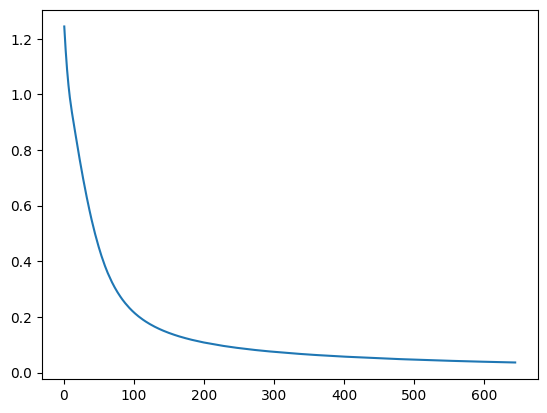

In [12]:
mlp2 = MLPClassifier(hidden_layer_sizes=(64), max_iter=max_iters, early_stopping=False)
mlp2.fit(X_train2, Y_train)
P_train2 = mlp2.predict(X_train2)
P_test2 = mlp2.predict(X_test2)
print(accuracy_score(P_train2, Y_train), accuracy_score(P_test2, Y_test))
iters2 = [i+1 for i in range(len(mlp2.loss_curve_))]
plt.plot(iters2, mlp2.loss_curve_)

0.998 1.0


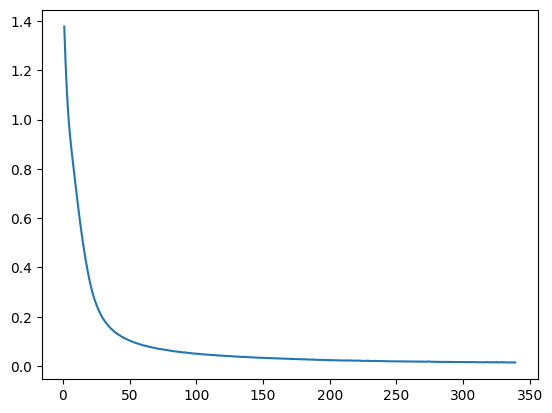

In [17]:
mlp2 = MLPClassifier(hidden_layer_sizes=(64,64), max_iter=max_iters, early_stopping=False)
mlp2.fit(X_train2, Y_train)
P_train2 = mlp2.predict(X_train2)
P_test2 = mlp2.predict(X_test2)
print(accuracy_score(P_train2, Y_train), accuracy_score(P_test2, Y_test))
iters2 = [i+1 for i in range(len(mlp2.loss_curve_))]
plt.plot(iters2, mlp2.loss_curve_)